Processing training data...

Fold 1/5
Training HMM models...

Training model for emotion: 0
Successfully trained and validated model for emotion: 0

Training model for emotion: 1
Successfully trained and validated model for emotion: 1

Training model for emotion: 2
Successfully trained and validated model for emotion: 2

Training model for emotion: 3
Successfully trained and validated model for emotion: 3

Training model for emotion: 4
Successfully trained and validated model for emotion: 4

Training model for emotion: 5


Model is not converging.  Current: -28442.284855375055 is not greater than -28442.28485526205. Delta is -1.1300653568468988e-07


Successfully trained and validated model for emotion: 5
Evaluating models...

Fold 1 Classification Report:
              precision    recall  f1-score   support

       angry       0.76      0.74      0.75       360
     disgust       0.80      0.63      0.71       358
     fearful       0.59      0.84      0.69       385
       happy       0.70      0.61      0.65       388
     neutral       0.69      0.88      0.78       354
         sad       0.80      0.55      0.65       377

    accuracy                           0.71      2222
   macro avg       0.72      0.71      0.70      2222
weighted avg       0.72      0.71      0.70      2222


Fold 2/5
Training HMM models...

Training model for emotion: 0
Successfully trained and validated model for emotion: 0

Training model for emotion: 1
Successfully trained and validated model for emotion: 1

Training model for emotion: 2
Successfully trained and validated model for emotion: 2

Training model for emotion: 3
Successfully trained and

Model is not converging.  Current: -31020.57660670829 is not greater than -30176.017864005004. Delta is -844.5587427032879


Successfully trained and validated model for emotion: 4

Training model for emotion: 5
Successfully trained and validated model for emotion: 5
Evaluating models...

Fold 3 Classification Report:
              precision    recall  f1-score   support

       angry       0.91      0.56      0.69       360
     disgust       0.64      0.78      0.71       358
     fearful       0.65      0.76      0.70       385
       happy       0.53      0.80      0.63       387
     neutral       0.79      0.45      0.57       354
         sad       0.73      0.64      0.69       377

    accuracy                           0.67      2221
   macro avg       0.71      0.67      0.67      2221
weighted avg       0.71      0.67      0.67      2221


Fold 4/5
Training HMM models...

Training model for emotion: 0


Model is not converging.  Current: -42682.94572337982 is not greater than -42682.94571979507. Delta is -3.584747901186347e-06


Successfully trained and validated model for emotion: 0

Training model for emotion: 1
Successfully trained and validated model for emotion: 1

Training model for emotion: 2
Successfully trained and validated model for emotion: 2

Training model for emotion: 3
Successfully trained and validated model for emotion: 3

Training model for emotion: 4


Model is not converging.  Current: -4237.66813874667 is not greater than -4237.665871388002. Delta is -0.0022673586672681267


Successfully trained and validated model for emotion: 4

Training model for emotion: 5
Successfully trained and validated model for emotion: 5
Evaluating models...

Fold 4 Classification Report:
              precision    recall  f1-score   support

       angry       0.74      0.70      0.72       360
     disgust       0.61      0.65      0.63       357
     fearful       0.68      0.71      0.70       386
       happy       0.74      0.59      0.66       387
     neutral       0.68      0.63      0.66       354
         sad       0.59      0.73      0.66       377

    accuracy                           0.67      2221
   macro avg       0.68      0.67      0.67      2221
weighted avg       0.68      0.67      0.67      2221


Fold 5/5
Training HMM models...

Training model for emotion: 0
Successfully trained and validated model for emotion: 0

Training model for emotion: 1
Successfully trained and validated model for emotion: 1

Training model for emotion: 2
Successfully trained and

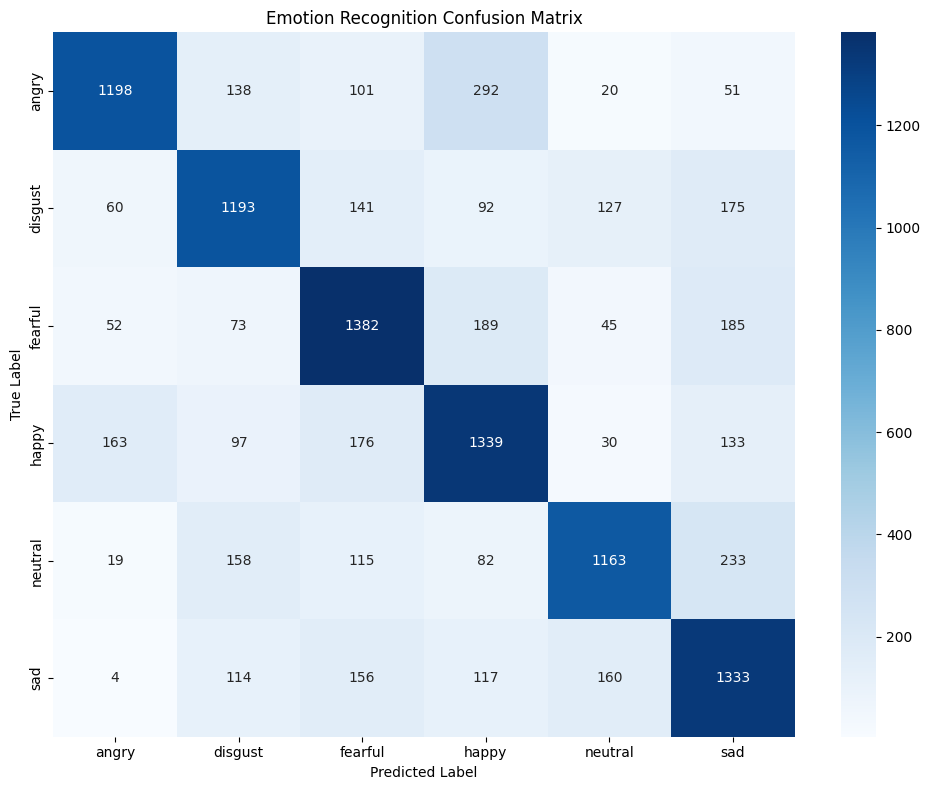


Training final model on all data...

Training model for emotion: 0
Successfully trained and validated model for emotion: 0

Training model for emotion: 1
Successfully trained and validated model for emotion: 1

Training model for emotion: 2
Successfully trained and validated model for emotion: 2

Training model for emotion: 3
Successfully trained and validated model for emotion: 3

Training model for emotion: 4
Successfully trained and validated model for emotion: 4

Training model for emotion: 5
Successfully trained and validated model for emotion: 5

Processing and evaluating on test data...

Test Set Classification Report:
              precision    recall  f1-score   support

       angry       0.88      0.97      0.92       360
     disgust       0.94      0.77      0.85       360
     fearful       0.85      0.95      0.90       360
       happy       0.91      0.73      0.81       360
     neutral       0.82      0.98      0.90       720
         sad       0.93      0.72      0

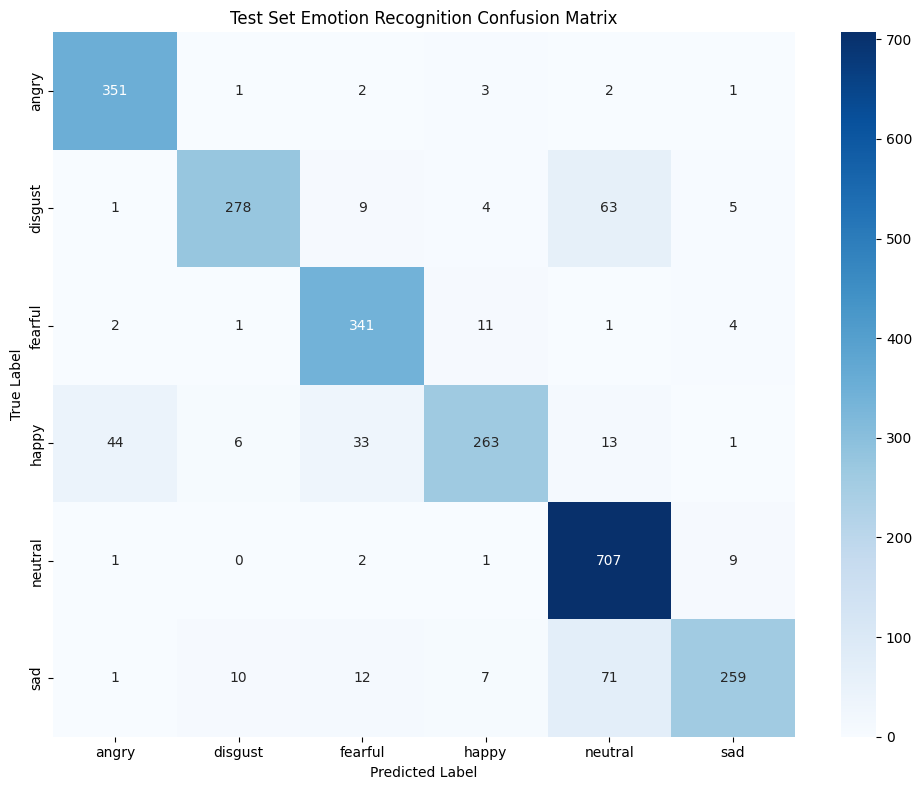

In [27]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder, StandardScaler
from hmmlearn import hmm
import joblib
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        
        # Existing and new features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        rms = librosa.feature.rms(y=y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        
        # Calculate statistics for features
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)
        zcr_mean = np.mean(zero_crossing_rate)
        zcr_std = np.std(zero_crossing_rate)
        rms_mean = np.mean(rms)
        rms_std = np.std(rms)
        sc_mean = np.mean(spectral_centroid)
        sc_std = np.std(spectral_centroid)
        sr_mean = np.mean(spectral_rolloff)
        sr_std = np.std(spectral_rolloff)
        chroma_mean = np.mean(chroma_stft, axis=1)
        chroma_std = np.std(chroma_stft, axis=1)

        # Combine all features into a single vector
        features = np.hstack((
            mfccs_mean, mfccs_std, 
            zcr_mean, zcr_std, 
            rms_mean, rms_std,
            sc_mean, sc_std,
            sr_mean, sr_std,
            chroma_mean, chroma_std,
            tempo
        ))
        return features
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

def create_hmm(n_components, n_features, covariance_type='full', n_iter=500):
    model = hmm.GaussianHMM(
        n_components=n_components,
        covariance_type=covariance_type,
        n_iter=n_iter,
        init_params='',
        random_state=42
    )
    
    # Initialize transition matrix
    transmat = np.random.dirichlet(np.ones(n_components), size=n_components)
    model.transmat_ = transmat
    
    # Initialize start probabilities
    model.startprob_ = np.random.dirichlet(np.ones(n_components))
    
    # Initialize means and covariances
    model.means_ = np.random.randn(n_components, n_features)
    if covariance_type == 'full':
        model.covars_ = np.stack([np.eye(n_features) for _ in range(n_components)])
    else:
        model.covars_ = np.ones((n_components, n_features))
    
    return model

def segment_features(features, segment_length=10):
    n_segments = max(len(features) // segment_length, 1)
    segments = np.array_split(features, n_segments)
    return segments

def train_emotion_models(df, n_components=5, covariance_type='full', n_iter=500):
    emotion_models = {}
    
    for emotion in df['emotion'].unique():
        print(f"\nTraining model for emotion: {emotion}")
        
        emotion_data = np.vstack(df[df['emotion'] == emotion]['features'].values)
        n_features = emotion_data.shape[1]
        
        model = create_hmm(n_components, n_features, covariance_type, n_iter)
        
        segments = segment_features(emotion_data)
        lengths = [len(segment) for segment in segments]
        training_data = np.vstack(segments)
        
        try:
            model.fit(training_data, lengths=lengths)
            
            if np.any(np.sum(model.transmat_, axis=1) == 0):
                zero_rows = np.where(np.sum(model.transmat_, axis=1) == 0)[0]
                for row in zero_rows:
                    model.transmat_[row] = np.ones(n_components) / n_components
            
            if (np.all(np.isclose(np.sum(model.transmat_, axis=1), 1.0)) and
                np.all(np.isclose(np.sum(model.startprob_), 1.0))):
                emotion_models[emotion] = model
                print(f"Successfully trained and validated model for emotion: {emotion}")
            else:
                print(f"Invalid model for emotion {emotion} - skipping")
                
        except Exception as e:
            print(f"Error training model for emotion {emotion}: {e}")
            continue
    
    return emotion_models

def augment_audio(y, sr):
    augmented = []
    
    # Time stretching
    stretch_rates = [0.8, 1.2]
    for rate in stretch_rates:
        augmented.append(librosa.effects.time_stretch(y, rate=rate))
    
    # Pitch shifting
    pitch_shifts = [-2, 2]
    for shift in pitch_shifts:
        augmented.append(librosa.effects.pitch_shift(y, sr=sr, n_steps=shift))
    
    # Adding white noise
    noise_factor = 0.005
    noise = np.random.randn(len(y))
    augmented.append(y + noise_factor * noise)
    
    return augmented

def extract_features_from_audio(y, sr):
    try:
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
        rms = librosa.feature.rms(y=y)
        spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
        
        # Calculate statistics for features
        mfccs_mean = np.mean(mfccs, axis=1)
        mfccs_std = np.std(mfccs, axis=1)
        zcr_mean = np.mean(zero_crossing_rate)
        zcr_std = np.std(zero_crossing_rate)
        rms_mean = np.mean(rms)
        rms_std = np.std(rms)
        sc_mean = np.mean(spectral_centroid)
        sc_std = np.std(spectral_centroid)
        sr_mean = np.mean(spectral_rolloff)
        sr_std = np.std(spectral_rolloff)
        chroma_mean = np.mean(chroma_stft, axis=1)
        chroma_std = np.std(chroma_stft, axis=1)

        # Combine all features into a single vector
        features = np.hstack((
            mfccs_mean, mfccs_std, 
            zcr_mean, zcr_std, 
            rms_mean, rms_std,
            sc_mean, sc_std,
            sr_mean, sr_std,
            chroma_mean, chroma_std,
            tempo
        ))
        return features
    except Exception as e:
        print(f"Error extracting features from audio: {e}")
        return None

def process_audio_directory(audio_dir, scaler=None):
    data = []
    
    for emotion in ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad']:
        emotion_dir = os.path.join(audio_dir, emotion)
        
        if not os.path.exists(emotion_dir):
            print(f"Directory {emotion_dir} does not exist.")
            continue
        
        for file in os.listdir(emotion_dir):
            if file.endswith('.wav'):
                file_path = os.path.join(emotion_dir, file)
                y, sr = librosa.load(file_path, sr=None)
                
                # Extract features for original audio
                features = extract_features(file_path)
                if features is not None:
                    data.append([features, emotion])
                    
                    # Augment audio and extract features
                    augmented_audio = augment_audio(y, sr)
                    for aug_y in augmented_audio:
                        aug_features = extract_features_from_audio(aug_y, sr)
                        if aug_features is not None:
                            data.append([aug_features, emotion])
    
    return data

def evaluate_models(emotion_models, test_data, le):
    predictions = []
    true_labels = []
    
    for features, emotion in test_data:
        best_score = float('-inf')
        best_emotion = None
        
        features_reshaped = features.reshape(1, -1)
        
        for emotion_label, model in emotion_models.items():
            try:
                if (np.all(np.isclose(np.sum(model.transmat_, axis=1), 1.0)) and
                    np.all(np.isclose(np.sum(model.startprob_), 1.0))):
                    score = model.score(features_reshaped)
                    if score > best_score:
                        best_score = score
                        best_emotion = emotion_label
            except Exception as e:
                print(f"Error during prediction for emotion {emotion_label}: {e}")
                continue
        
        if best_emotion is not None:
            predictions.append(best_emotion)
            true_labels.append(le.transform([emotion])[0])
    
    return predictions, true_labels

def main():
    # Paths
    train_dir = 'C:/Users/twolo/Desktop/probability/Project/Dataset_Audio'  # Update with your paths
    test_dir = 'C:/Users/twolo/Desktop/probability/Project/Test_Audio'
    
    # Process training data
    print("Processing training data...")
    train_data = process_audio_directory(train_dir)
    df_train = pd.DataFrame(train_data, columns=['features', 'emotion'])
    
    # Encode emotions
    le = LabelEncoder()
    df_train['emotion'] = le.fit_transform(df_train['emotion'])
    
    # Scale features
    scaler = StandardScaler()
    features_array = np.vstack(df_train['features'].values)
    scaled_features = scaler.fit_transform(features_array)
    df_train['features'] = list(scaled_features)
    
    # Cross-validation
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    overall_predictions = []
    overall_true_labels = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(df_train['features'], df_train['emotion']), 1):
        print(f"\nFold {fold}/{n_splits}")
        
        train_fold = df_train.iloc[train_index]
        val_fold = df_train.iloc[val_index]
        
        # Train models
        print("Training HMM models...")
        emotion_models = train_emotion_models(train_fold, n_components=5, covariance_type='full', n_iter=500)
        
        # Evaluate on validation set
        print("Evaluating models...")
        val_data = list(zip(val_fold['features'], le.inverse_transform(val_fold['emotion'])))
        predictions, true_labels = evaluate_models(emotion_models, val_data, le)
        
        overall_predictions.extend(predictions)
        overall_true_labels.extend(true_labels)
        
        # Print fold results
        print(f"\nFold {fold} Classification Report:")
        print(classification_report(true_labels, predictions, target_names=le.classes_))
    
    # Overall results
    print("\nOverall Classification Report:")
    print(classification_report(overall_true_labels, overall_predictions, target_names=le.classes_))
    
    # Plot confusion matrix
    cm = confusion_matrix(overall_true_labels, overall_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=le.classes_,
               yticklabels=le.classes_)
    plt.title('Emotion Recognition Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # Train final model on all data
    print("\nTraining final model on all data...")
    final_models = train_emotion_models(df_train, n_components=5, covariance_type='full', n_iter=500)
    
    # Save models and preprocessors
    joblib.dump(final_models, 'hmm_emotion_models.pkl')
    joblib.dump(scaler, 'feature_scaler.pkl')
    joblib.dump(le, 'label_encoder.pkl')
    
    # Process and evaluate on test data
    print("\nProcessing and evaluating on test data...")
    test_data = process_audio_directory(test_dir)
    df_test = pd.DataFrame(test_data, columns=['features', 'emotion'])
    
    # Scale test features
    test_features_array = np.vstack(df_test['features'].values)
    scaled_test_features = scaler.transform(test_features_array)
    df_test['features'] = list(scaled_test_features)
    
    test_data = list(zip(df_test['features'], df_test['emotion']))
    test_predictions, test_true_labels = evaluate_models(final_models, test_data, le)
    
    print("\nTest Set Classification Report:")
    print(classification_report(test_true_labels, test_predictions, target_names=le.classes_))
    
    # Plot test confusion matrix
    test_cm = confusion_matrix(test_true_labels, test_predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=le.classes_,
               yticklabels=le.classes_)
    plt.title('Test Set Emotion Recognition Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()